In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df = pd.read_csv('Mall_customer.csv')
print(f"{df.head()}\n")
print(f"{df.shape}\n")
print(f"{df.info()}\n")
print(f"{df.describe()}\n")

   CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40

(200, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

       CustomerID         Age  Annual Income  Spending Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000      60.560000       

Female    112
Male       88
Name: Gender, dtype: int64



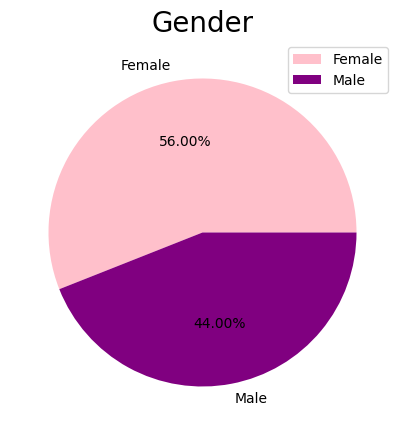

In [ ]:
size = df['Gender'].value_counts()
print(f"{size}\n")

labels = ['Female', 'Male']
colors = ['Pink', 'Purple']

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.legend()
plt.show()

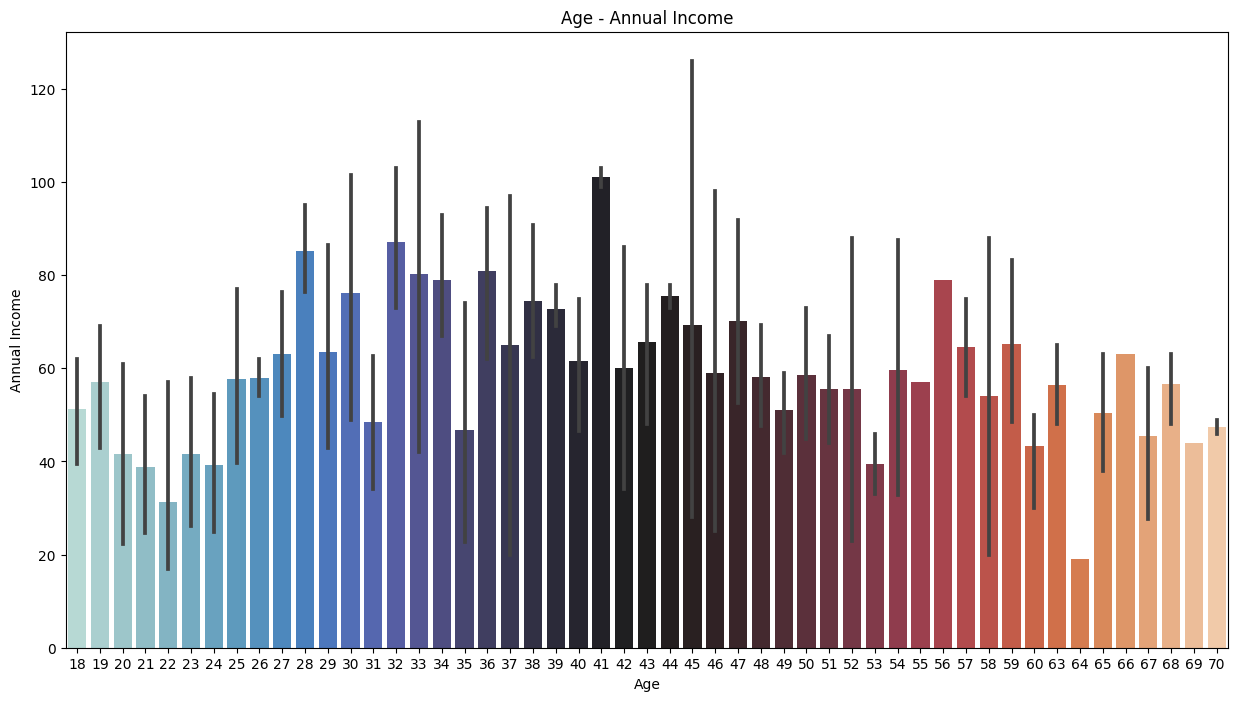

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Age - Annual Income')
sns.barplot(x=df['Age'], y=df['Annual Income'], palette='icefire')
plt.show()

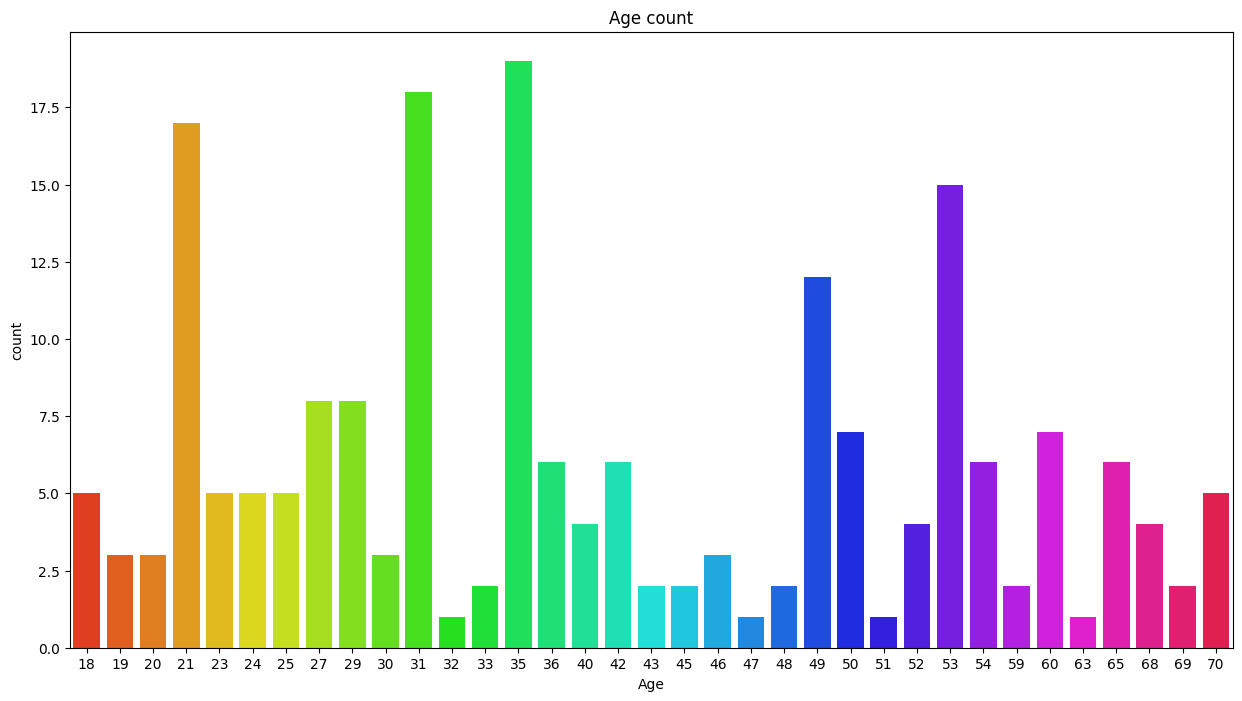

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], x=df['Age'], palette='hsv')
plt.title('Age count')
plt.show()

<ipython-input-6-8e05d89d8ada>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Wistia', annot=True)


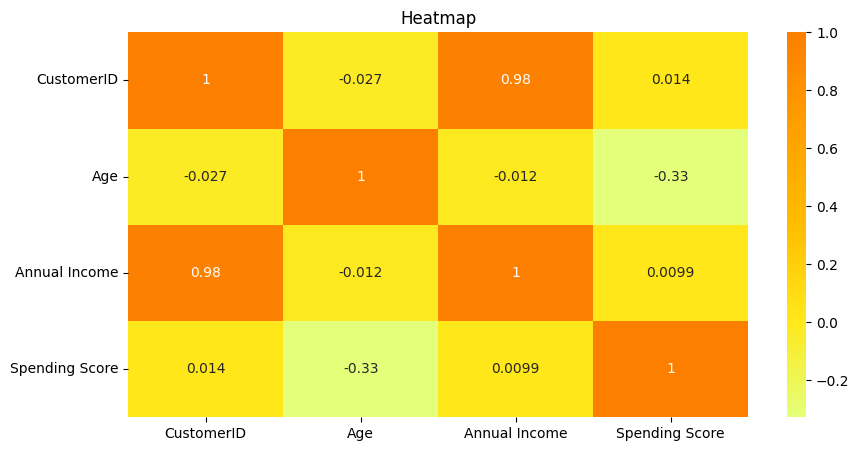

In [ ]:
plt.rcParams['figure.figsize']=(10, 5)
sns.heatmap(df.corr(), cmap='Wistia', annot=True)
plt.title('Heatmap')
plt.show()

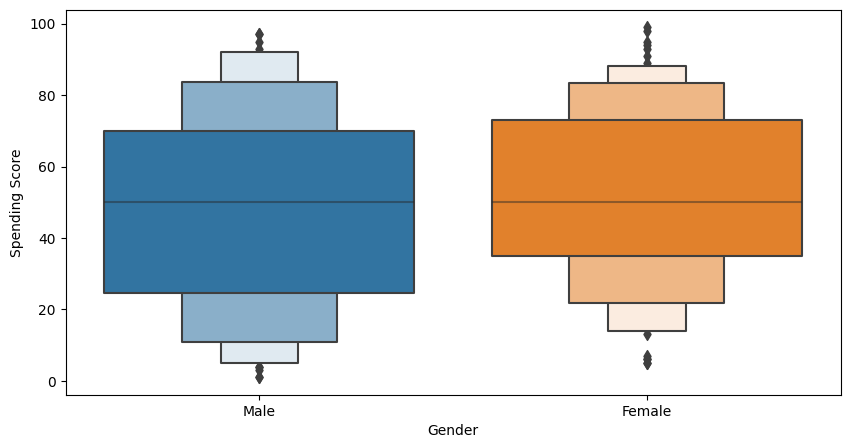

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
sns.boxenplot(x=df['Gender'], y=df['Spending Score'])
plt.show()

x shape: (200, 2)



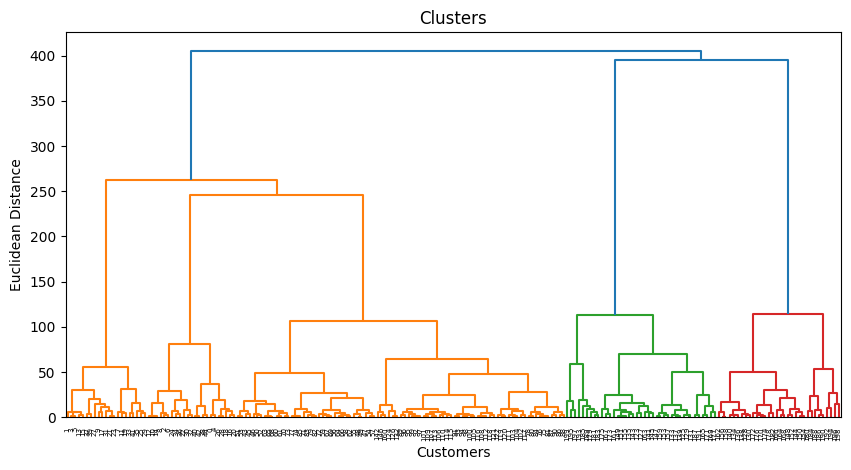

In [ ]:
x = df.iloc[:, [3,4]].values

print(f"x shape: {x.shape}\n")

dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.title('Clusters')
plt.show()


In [18]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') # bottom-up

yhc = hc.fit_predict(x)

print(f'yhc shape: {yhc.shape}\n')
print(f'yhc values: {yhc}\n')
print(f'yhc == 0: {yhc == 0}\n')

yhc shape: (200,)

yhc values: [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]

yhc == 0: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False Fal

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


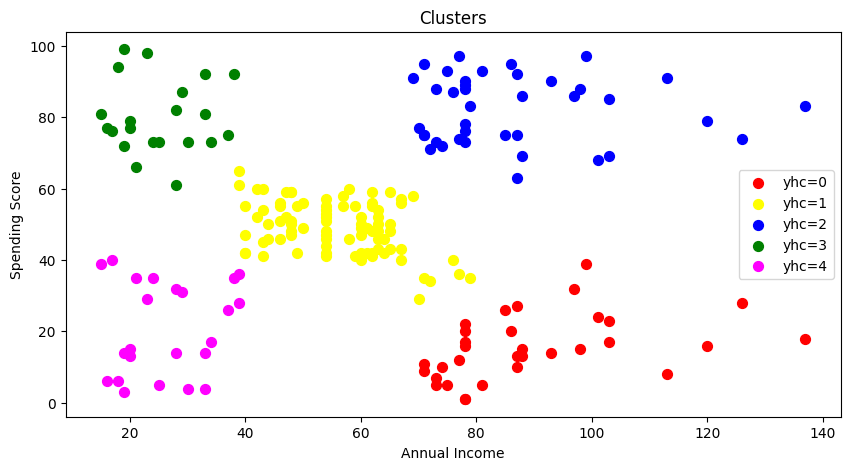

In [19]:
plt.scatter(x[yhc == 0, 0], x[yhc == 0, 1], s=50, c='red', label='yhc=0')
plt.scatter(x[yhc == 1, 0], x[yhc == 1, 1], s=50, c='yellow', label='yhc=1')
plt.scatter(x[yhc == 2, 0], x[yhc == 2, 1], s=50, c='blue', label='yhc=2')
plt.scatter(x[yhc == 3, 0], x[yhc == 3, 1], s=50, c='green', label='yhc=3')
plt.scatter(x[yhc == 4, 0], x[yhc == 4, 1], s=50, c='magenta', label='yhc=4')

plt.title('Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

plt.show()